Jupyter Notebook used for the analysis of the number of attribute for each identities generated.

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
# Please change name to the path to the file containing the attribute if necessary
name = "../typescript/credentials/identity_attributes_driving_license.csv"
# If only a subset of the identitiy must be used.
size_evaluation = 1000


df = pd.read_csv(name).iloc[:size_evaluation]
df["JSON information"] = df["JSON information"].apply(lambda x: json.loads(x))
df["number_attributes"]= 12+df["Number of general additional informations"]+3*df["Number of categories"]+df["Number of additional inforations of each categories"].apply(lambda x: sum(map(int, x.split(','))))

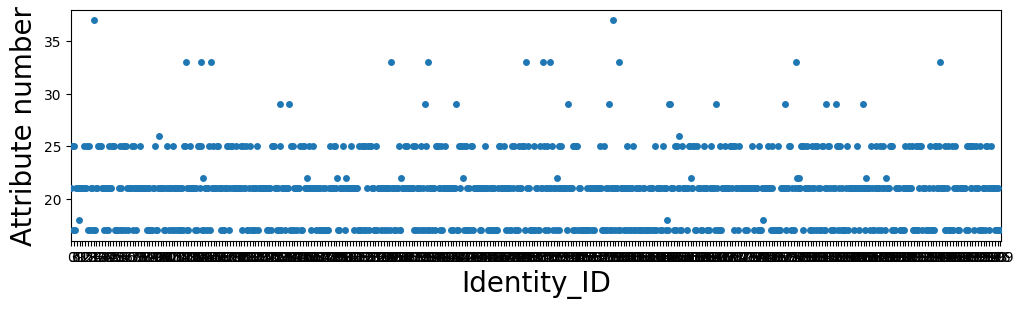

number_attributes
21    467
17    303
25    187
29     13
22     12
33     11
18      3
37      2
26      2
Name: count, dtype: int64
count    1000.000000
mean       20.817000
std         3.291557
min        17.000000
25%        17.000000
50%        21.000000
75%        21.000000
max        37.000000
Name: number_attributes, dtype: float64


In [ ]:
# First Plot presenting the repartition of the number of attributes
plt.figure(figsize=(12, 3))
strip = sns.stripplot(x=df["Personal Number"], y=df["number_attributes"])
strip.set_xticks(range(0,size_evaluation,3))
strip.set_xlabel("Identity_ID", fontsize=20)
strip.set_ylabel("Attribute number", fontsize=20)
plt.show()

# Recovery of the average and variance of the attributes, 
# with the count of the number of identities for each number of attributes
print(df["number_attributes"].value_counts())
print(df["number_attributes"].describe())

 Unique Number attribute [21 25 17 18 37 26 33 22 29]



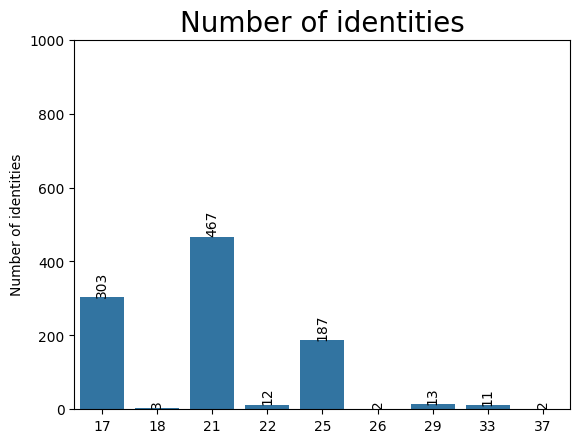

In [ ]:
print(f" Unique Number attribute {df["number_attributes"].unique()}\n")

# Second plot to present the identities generated
g = sns.countplot(x=df["number_attributes"], orient="y", order=df["number_attributes"].unique().sort())
g.bar_label(g.containers[0], rotation=90)
g.set_title("Number of identities", fontsize=20)
g.set_xlabel("", fontsize=20)
g.set_ylabel("Number of identities", fontsize=10)
g.set(ylim=(0, size_evaluation))
plt.show()